<a href="https://colab.research.google.com/github/junyoung-jang/MNIST_Classsification/blob/main/ML4ME_temproject_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## 필요한 라이브러리 import
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt
import sys

In [ ]:
data = pd.read_csv('/content/sample_data/mnist_train_small.csv')
data = np.array(data)
data2 = pd.read_csv('/content/sample_data/mnist_test.csv')
data2 = np.array(data2)
print(len(data))
Y_train = data[:25000,0]
X_train = data[:25000,1:]/255
Y_train2 = data2[:9999,0]
X_train2 = data2[:9999,1:]/255
X_train = np.append(X_train, X_train2, axis=0)
Y_train = np.append(Y_train, Y_train2)

Y_test = pd.read_csv('/content/drive/MyDrive/label.csv', header=None, index_col=None)
Y_test = np.array(Y_test)


19999


In [ ]:
data2[:,0]

array([2, 1, 0, ..., 4, 5, 6])

In [ ]:
len(data2)

9999

In [ ]:
import os
## PIL로 이미지 불러오고 데이터 Stack
folder_path = '/content/drive/MyDrive/train'
image_list = []
for i in range(100):
    # 파일 경로 생성
    file_path = os.path.join(folder_path, f"{i}.png")
    image = np.array(PIL.Image.open(file_path)) / 255.
    image_list.append(image)

## (28, 140)>(28,28) 5개로 분할
sliced_images = []

for image in image_list:
    slices = [image[:, i:i+28] for i in range(0, 140, 28)]
    sliced_images.append(slices)

for i, slices in enumerate(sliced_images):
    print(f"Image {i+1}:")
    for j, slice_i in enumerate(slices):
        print(f"  Slice {j+1}:")



Image 1:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 2:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 3:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 4:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 5:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 6:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 7:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 8:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 9:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 10:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 11:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 12:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 13:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 14:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 15:
  Slice 1:
  Slice 2:
  Slice 3:
  Slice 4:
  Slice 5:
Image 16:
  Slice 1:
  Slice 2:
  

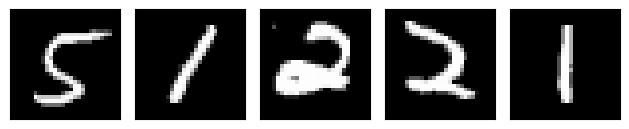

In [ ]:
## 이미지 분할 여부 확인
fig, ax = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(5):
  img = sliced_images[1][i].reshape(28, 28)
  ax[i].imshow(img,cmap='gray',)
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()

In [ ]:
from PIL import Image
test = X_train[0].reshape(28, 28)
test2 = Image.fromarray(test)
flip_img= test2.transpose(Image.TRANSVERSE)
rotation_X_train_5deg = X_train[:2500]
rotation_Y_train_5deg = Y_train[:2500]
rotation_X_train_10deg = X_train[2500:5000]
rotation_Y_train_10deg = Y_train[2500:5000]

temp_rotation_5deg = []
for i in range(len(rotation_X_train_5deg)):
    img_array = rotation_X_train_5deg[i].reshape(28, 28)
    img = Image.fromarray(img_array)
    rotated_img = img.rotate(5)
    temp_rotation_5deg.append(rotated_img)
    temp_rotation_5deg[i]=np.array(temp_rotation_5deg[i])
    temp_rotation_5deg[i]=temp_rotation_5deg[i].flatten()

temp_rotation_10deg = []
for i in range(len(rotation_X_train_10deg)):
    img_array = rotation_X_train_10deg[i].reshape(28, 28)
    img = Image.fromarray(img_array)
    rotated_img = img.rotate(10)
    temp_rotation_10deg.append(rotated_img)
    temp_rotation_10deg[i]=np.array(temp_rotation_10deg[i])
    temp_rotation_10deg[i]=temp_rotation_10deg[i].flatten()

X_train_concated = X_train.copy()
Y_train_concated = Y_train.copy()
for i in range(len(temp_rotation_10deg)):
  X_train_concated = np.append(X_train_concated, [temp_rotation_10deg[i]], axis=0)
  Y_train_concated = np.append(Y_train_concated, [rotation_Y_train_10deg[i]])
  print(X_train_concated.shape)

for i in range(len(temp_rotation_5deg)):
  X_train_concated = np.append(X_train_concated, [temp_rotation_5deg[i]], axis=0)
  Y_train_concated = np.append(Y_train_concated, [rotation_Y_train_5deg[i]])
  print(X_train_concated.shape)


(29999, 784)
(30000, 784)
(30001, 784)
(30002, 784)
(30003, 784)
(30004, 784)
(30005, 784)
(30006, 784)
(30007, 784)
(30008, 784)
(30009, 784)
(30010, 784)
(30011, 784)
(30012, 784)
(30013, 784)
(30014, 784)
(30015, 784)
(30016, 784)
(30017, 784)
(30018, 784)
(30019, 784)
(30020, 784)
(30021, 784)
(30022, 784)
(30023, 784)
(30024, 784)
(30025, 784)
(30026, 784)
(30027, 784)
(30028, 784)
(30029, 784)
(30030, 784)
(30031, 784)
(30032, 784)
(30033, 784)
(30034, 784)
(30035, 784)
(30036, 784)
(30037, 784)
(30038, 784)
(30039, 784)
(30040, 784)
(30041, 784)
(30042, 784)
(30043, 784)
(30044, 784)
(30045, 784)
(30046, 784)
(30047, 784)
(30048, 784)
(30049, 784)
(30050, 784)
(30051, 784)
(30052, 784)
(30053, 784)
(30054, 784)
(30055, 784)
(30056, 784)
(30057, 784)
(30058, 784)
(30059, 784)
(30060, 784)
(30061, 784)
(30062, 784)
(30063, 784)
(30064, 784)
(30065, 784)
(30066, 784)
(30067, 784)
(30068, 784)
(30069, 784)
(30070, 784)
(30071, 784)
(30072, 784)
(30073, 784)
(30074, 784)
(30075, 784)

In [ ]:
from sklearn.svm import SVC

# SVM 모델 생성
svm_model = SVC(kernel='rbf', C=8, gamma=0.03)  # 여기서 적절한 커널과 하이퍼파라미터 설정

# 훈련 데이터를 사용하여 SVM 모델 훈련
svm_model.fit(X_train_concated, Y_train_concated)

outputs = []

# 이미지 별로 예측 수행
for i in range(len(sliced_images)):
    output = []
    for j in range(5):
        # 이미지를 1차원 배열로 변환하여 SVM 모델에 입력
        input_data = sliced_images[i][j].reshape(1, -1)

        # SVM 모델을 사용하여 예측
        prediction = svm_model.predict(input_data)
        output.append(prediction)

    outputs.append(output)


In [ ]:
Y_test

array([[0, 8, 7, 0, 7],
       [5, 1, 2, 2, 1],
       [4, 0, 9, 2, 1],
       [5, 4, 1, 5, 3],
       [0, 8, 2, 6, 4],
       [6, 6, 6, 2, 2],
       [8, 0, 2, 2, 5],
       [7, 4, 4, 3, 0],
       [4, 2, 9, 5, 6],
       [1, 0, 4, 4, 8],
       [1, 1, 8, 6, 1],
       [2, 3, 9, 7, 6],
       [6, 3, 3, 5, 3],
       [5, 0, 0, 3, 2],
       [3, 6, 0, 6, 2],
       [7, 2, 6, 7, 6],
       [0, 9, 5, 4, 3],
       [6, 8, 5, 2, 1],
       [2, 3, 9, 7, 7],
       [8, 8, 0, 6, 8],
       [5, 4, 2, 4, 9],
       [9, 6, 4, 0, 4],
       [5, 5, 9, 3, 2],
       [4, 1, 9, 8, 8],
       [1, 3, 4, 3, 4],
       [5, 3, 5, 1, 7],
       [2, 6, 9, 0, 7],
       [8, 9, 6, 6, 7],
       [8, 4, 3, 0, 4],
       [0, 2, 1, 3, 1],
       [5, 1, 2, 7, 8],
       [3, 7, 3, 8, 3],
       [0, 6, 7, 0, 8],
       [2, 5, 4, 1, 4],
       [2, 2, 4, 2, 8],
       [6, 4, 9, 8, 1],
       [0, 8, 5, 5, 6],
       [6, 2, 5, 2, 2],
       [5, 8, 5, 2, 7],
       [7, 8, 2, 9, 4],
       [4, 9, 9, 2, 0],
       [9, 7, 6,

In [ ]:
## predicted된 데이터 합치기
output_concate = []
for i in range(len(outputs)):
  combined_array = np.array([])
  for j in range(5):
    combined_array = np.concatenate((combined_array, np.array(outputs[i][j])))


  output_concate.append(combined_array)

## array>list

'''
for i in range(len(output_concate)):
  output_concate[i] = list(output_concate[i])
'''

'\nfor i in range(len(output_concate)):\n  output_concate[i] = list(output_concate[i])\n'

In [ ]:
acc = (np.sum(Y_test == output_concate).astype(float) / 500)
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 98.80%
